## 1. Installation and Data Loading

In [ ]:
!pip install smartnoise-synth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/ryan112358/private-pgm.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ryan112358/private-pgm.git to /tmp/pip-req-build-l7ks8re7
  Running command git clone --filter=blob:none --quiet https://github.com/ryan112358/private-pgm.git /tmp/pip-req-build-l7ks8re7
  Resolved https://github.com/ryan112358/private-pgm.git to commit 5b9126295c110b741e5426ddbff419ea1e60e788
  Preparing metadata (setup.py) ... done


In [ ]:
from snsynth import Synthesizer
import pandas as pd

#data_csv_path = 'drive/MyDrive/DATA/MTX_NAs_Dropped.csv'
data_csv_path = 'drive/MyDrive/DATA/MTX_NAs_Dropped_v2.csv'
das_score_cols = ['das28_remission_m0','das28_remission_m3','das28_remission_m6','das28_remission_m12']

dat = pd.read_csv(data_csv_path,sep=' ') # in datasets/
# Check if dat lodade correctly
#dat.head()

In [ ]:
from snsynth.transform import TableTransformer, LabelTransformer, MinMaxTransformer, DropTransformer, BinTransformer

# V1
tt = TableTransformer([
    LabelTransformer(), # sex
    #MinMaxTransformer(lower=18, upper=100), # age
    #DropTransformer(), # IGNORING AGE
    BinTransformer(bins=10, lower=18, upper=100), # age
    LabelTransformer(), # das28_remission_m0
    LabelTransformer(), # das28_remission_m3
    LabelTransformer(), # das28_remission_m6
    LabelTransformer() # das28_remission_m12
])

tt_v2 =  TableTransformer([
    LabelTransformer(), # sex
    BinTransformer(bins=10, lower=18, upper=100), # age
    LabelTransformer(), # crp baseline 
    BinTransformer(bins=4, lower=0, upper=100.1), # patient global assessment at baseline 
    LabelTransformer(), # das28_remission_m0
    LabelTransformer(), # das28_remission_m3
    LabelTransformer(), # das28_remission_m6
    LabelTransformer() # das28_remission_m12
])


#dat_encoded = tt.fit_transform(dat)
#dat_encoded[0:10]

# tt_neural = TableTransformer([
#     LabelTransformer(), # sex
#     MinMaxTransformer(lower=18, upper=100), # age
#     LabelTransformer(), # das28_remission_m0
#     LabelTransformer(), # das28_remission_m3
#     LabelTransformer(), # das28_remission_m6
#     LabelTransformer() # das28_remission_m12
# ])

dat_encoded = tt_v2.fit_transform(dat)
dat_encoded[0:10]

[(1, 3, 1, 3, 0, 1, 0, 0),
 (0, 2, 1, 2, 0, 0, 0, 0),
 (0, 1, 0, 3, 0, 0, 0, 0),
 (0, 4, 3, 2, 0, 0, 0, 0),
 (0, 3, 1, 1, 0, 1, 1, 1),
 (0, 2, 3, 3, 0, 0, 0, 0),
 (0, 3, 1, 2, 0, 1, 1, 1),
 (0, 3, 1, 2, 0, 0, 0, 0),
 (0, 3, 1, 2, 0, 0, 0, 0),
 (0, 6, 3, 3, 0, 0, 0, 0)]

## 2. Set up Synthesizer

In [ ]:
# synth = Synthesizer.create('dpctgan', epsilon=10.0, batch_size=400, 
#                            embedding_dim=8, generator_dim=(16, 16), discriminator_dim=(16, 16),
#                            generator_lr=0.0005, generator_decay=1e-06,
#                            discriminator_lr=0.0005, discriminator_decay=1e-06,
#                            discriminator_steps=1, pac=1, cuda=True,
#                            disabled_dp=False, delta=None, sigma=5,
#                            max_per_sample_grad_norm=1.0, loss='cross_entropy',
                           
                           
#                            epochs=300,
#                            verbose=True,

#                            )

# PAC SYNTH IS BUGGED, OMITTING
# synth = Synthesizer.create('pacsynth', epsilon=0.1, delta=None, empty_value='',
#                            reporting_length=2, percentile_percentage=99, percentile_epsilon_proportion=0.01,
#                            number_of_records_epsilon_proportion=0.005, use_synthetic_counts=False,
#                            weight_selection_percentile=95, aggregate_counts_scale_factor=None, verbose=True)


# sample_dat = synth.fit_sample(
#     dat, transformer=tt_v2,
#     )
synth = Synthesizer.create(
            'mst', epsilon=0.1, delta=1e-09, verbose=False
            )

#synth.fit(dat, transformer=tt_v2)
sample_dat = synth.fit_sample(dat, transformer=tt_v2)
#N=len(dat)
#sample_dat = synth.sample_conditional(N, condition="pga_m0>-1000")
#sample_dat = synth.sample_conditional(N, "pga_m0 >= 0 AND pga_m0 <= 100")

# sample_dat = synth.fit_sample(
#    dat, transformer=tt_neural,
#    categorical_columns=['sex','das28_remission_m0','das28_remission_m3','das28_remission_m6','das28_remission_m12'],
#    ordinal_columns=[], continuous_columns=['age']
#    )
# sample_dat = synth.fit_sample(dat, preprocessor_eps=1.0)
#print(sample_dat)

In [ ]:
#from collections import Counter
#Counter(sample_dat['pga_m0'])

In [ ]:
#x = dat
#plt.plot()

x = (0,3,6,12)

dat_sub = dat[['das28_remission_m0','das28_remission_m3','das28_remission_m6','das28_remission_m12']]
y1 = list(dat_sub.mean())

sample_dat_sub = sample_dat[['das28_remission_m0','das28_remission_m3','das28_remission_m6','das28_remission_m12']]
y2 = list(sample_dat_sub.mean())

#sample_dat_sub =
#y1 = ()
#print(sample_dat)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Month')

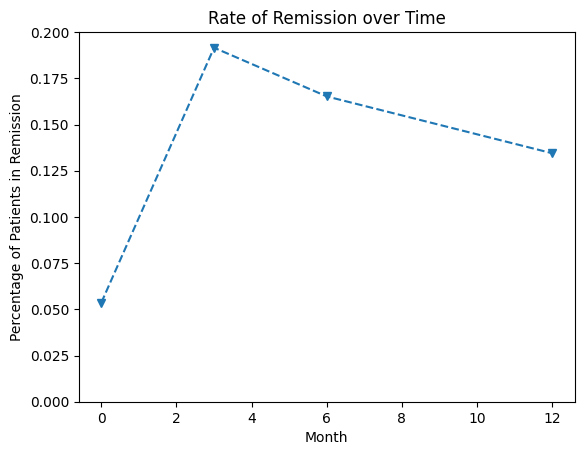

In [ ]:
ax = plt.gca()
plt.plot(x,y1,'v',linestyle='dashed',label='Original Data')
#plt.plot(x,y2,label='Synthetic Data')
#plt.legend()
plt.title("Rate of Remission over Time")
plt.ylabel("Percentage of Patients in Remission")
ax.set_ylim(bottom=0, top=0.2)
plt.xlabel("Month")

In [ ]:
np.around(y1,4)*100

array([ 5.36, 19.16, 16.52, 13.44])

Text(0.5, 0, 'Month')

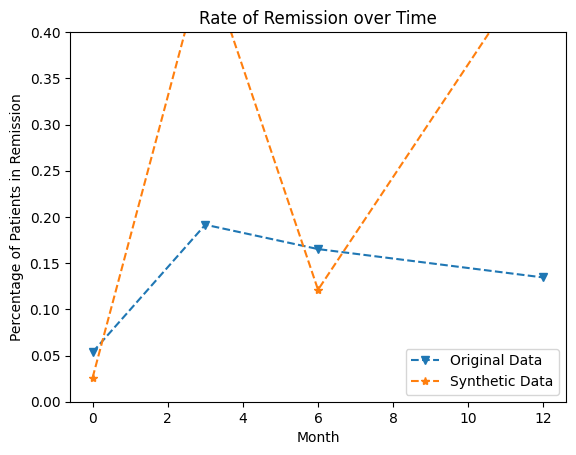

In [ ]:
ax = plt.gca()
plt.plot(x,y1,'v',linestyle='dashed',label='Original Data')
plt.plot(x,y2,'*',linestyle='dashed',label='Synthetic Data')
plt.legend()
ax.set_ylim(bottom=0, top=0.4)
plt.title("Rate of Remission over Time")
plt.ylabel("Percentage of Patients in Remission")
plt.xlabel("Month")

In [ ]:
np.around(y2,4)*100

array([ 2.6 , 48.23, 12.12, 48.76])

## 3. Generate Samples

In [ ]:
#eps = (0.05, 0.1, 0.2, 0.5, 1.0, 1.25, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 10.0)
#eps = (0.05, 0.1)
#eps = (0.2, 0.5)
#eps = (1.0, 1.25)
#eps = (1.5, 2.0)
#eps = (2.5, 3.0) #CRASHED!
#eps = (3.5, 4.0)
eps = (5.0, 10.0)

#eps = (1.0, 2.0)
#eps = (5.0,10.0)

#eps = (0.1, 10.0)

neps = len(eps)
K = 20 #SINGLE REPLACEMENT FOR THE BROKEN ROW IN THE FIRST ONE
synthesizer_count = 3
trials = []

from tqdm.notebook import tqdm 


for i in tqdm(range(neps), position=0, desc="i", leave=False, colour='green', ncols=80):
  trials.append([])
  synthesizers = [
        Synthesizer.create(
            'mwem', epsilon=eps[i], split_factor=10,
            q_count=None, iterations=None, splits=[], 
            marginal_width=None, add_ranges=False, measure_only=False, max_retries_exp_mechanism=10, mult_weights_iterations=20,
            verbose=False
            ),         
        Synthesizer.create(
            'mst', epsilon=eps[i], delta=1e-09, verbose=False
            ),
        Synthesizer.create(
            'aim', epsilon=eps[i], delta=1e-09,
            max_model_size=80, degree=2, num_marginals=None, max_cells=10000, rounds=None,
            verbose=False
            ),

        # Synthesizer.create('dpctgan', epsilon=eps[i], batch_size=400, 
        #                    embedding_dim=8, generator_dim=(16, 16), discriminator_dim=(16, 16),
        #                    generator_lr=0.0005, generator_decay=1e-06,
        #                    discriminator_lr=0.0005, discriminator_decay=1e-06,
        #                    discriminator_steps=1, pac=1, cuda=True,
        #                    disabled_dp=False, delta=None, sigma=5,
        #                    max_per_sample_grad_norm=1.0, loss='cross_entropy',
                           
                           
        #                    epochs=300,
        #                    verbose=True,

        #                    )
  ]
  for j in tqdm(range(synthesizer_count), position=1, desc="j", leave=False, colour='green', ncols=80):
    trials[-1].append([])
    for k in tqdm(range(K), position=2, desc="k", leave=False, colour='green', ncols=80):
      synth = synthesizers[j]
      # DO NOT USE TRANSFORMER FOR GANS!
      # if j >= 2:
      #   trial = synth.fit_sample(dat, preprocessor_eps=1.0)
      # else:
      #   trial = synth.fit_sample(dat, transformer=tt, preprocessor_eps=1.0)
      trial = synth.fit_sample(dat, transformer=tt_v2)
      trials[-1][-1].append(trial)
      #print(trials)

i:   0%|                                                  | 0/2 [00:00<?, ?it/s]

j:   0%|                                                  | 0/3 [00:00<?, ?it/s]

k:   0%|                                                 | 0/20 [00:00<?, ?it/s]

k:   0%|                                                 | 0/20 [00:00<?, ?it/s]

k:   0%|                                                 | 0/20 [00:00<?, ?it/s]

8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009
8
Initial Sigma 15.10445381294009


j:   0%|                                                  | 0/3 [00:00<?, ?it/s]

k:   0%|                                                 | 0/20 [00:00<?, ?it/s]

k:   0%|                                                 | 0/20 [00:00<?, ?it/s]

k:   0%|                                                 | 0/20 [00:00<?, ?it/s]

8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404
8
Initial Sigma 8.074190903371404


## Optional.

Save Snapshot of Data for Visualization Adjustments

In [ ]:
import pickle, datetime

with open(f'drive/MyDrive/DATA/{datetime.datetime.now()}-mtx.pkl', 'wb') as outp:
    pickle.dump(trials, outp, pickle.HIGHEST_PROTOCOL)
